<a href="https://colab.research.google.com/github/poorya99/opencv/blob/main/mnist_FC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

def plot_history(net_history):
  losses = history['loss']
  accuracies = history['accuracy']
  val_losses = history['val_loss']
  val_accuracy = history['val_accuracy']
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.plot(losses)
  plt.plot(val_losses)
  plt.legend(['loss', 'val_loss'])

  plt.figure()

  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(accuracies)
  plt.plot(val_accuracy)
  plt.legend(['acc', 'val_acc'])


  

# Load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Data attributes
print("train_images dimentions: ", train_images.ndim)
print("train_images shape: ", train_images.shape)
print("train_images type: ", train_images.dtype)


X_train = train_images.reshape(60000, 784)
X_test = test_images.reshape(10000, 784)

X_train = X_train.astype('float')
X_test = X_test.astype('float')

X_train /= 255
X_test /= 255


from keras.utils import np_utils
Y_train = np_utils.to_categorical(train_labels)
Y_test = np_utils.to_categorical(test_labels)



# ======================================


from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy



myModel = Sequential()
myModel.add(Dense(500, activation='relu', input_shape = (784,)))
myModel.add(Dropout(20))
myModel.add(Dense(100, activation='relu'))
myModel.add(Dropout(20))
myModel.add(Dense(10, activation='softmax'))


myModel.summary()
myModel.compile(optimizer=SGD(lr=0.001),
                loss=categorical_crossentropy, metrics=['accuracy'])

# ======================================
network_history = myModel.fit(X_train, Y_train, 128,
                              epochs=20,validation_split=0.2)


train_images dimentions:  3
train_images shape:  (60000, 28, 28)
train_images type:  uint8
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_19 (Dense)             (None, 100)               50100     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1010      
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 2.2671 - accuracy: 0.1441 - val_loss: 2.0518 - val_accuracy: 0.4120
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 1.9863 - accuracy: 0.4699 - val_loss: 1.7691 - val_accuracy: 0.6468
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 1.7100 - accuracy: 0.6611 - val_loss: 1.4906 - val_accuracy: 0.7492
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 1.4451 - accuracy: 0.7418 - val_loss: 1.2475 - val_accuracy: 0.7944
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 1.2191 - accuracy: 0.7861 - val_loss: 1.0548 - val_accuracy: 0.8215
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 1.0420 - accuracy: 0.8110 - val_loss: 0.9096 - val_accuracy: 0.8373
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.9146 - accuracy: 0.8190 - val_loss: 0.8008 - val_accuracy: 0.8489
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


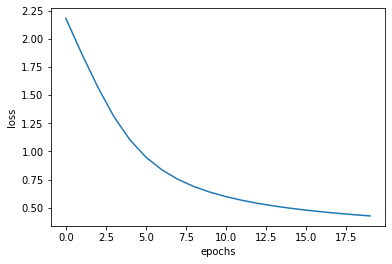

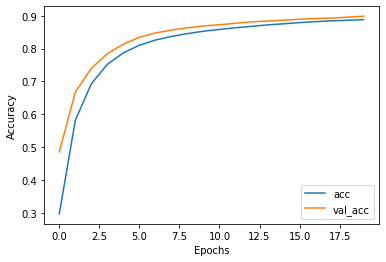

In [16]:


history = network_history.history
print(history.keys())

plot_history(network_history)




In [20]:
# Evaluate
import numpy as np

test_loss, test_acc = myModel.evaluate(X_test, Y_test)
print(test_loss, test_acc)

test_labels_p = myModel.predict(X_test)
test_labels_p = np.argmax(test_labels_p, axis=1)

# Change layers config
# myModel.layers[0].name = 'Layer_0'
# myModel.layers[0].trainable = False
# myModel.layers[0].get_config()

313/313 [==============================] - 1s 2ms/step - loss: 0.4051 - accuracy: 0.8980
0.405109167098999 0.8980000019073486
